#### Importing  Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### READING DATASET

In [263]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')  
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [264]:
df.rename(columns = {'fixed acidity':'Fixed_Acidity', 'volatile acidity':'Volatile_Acidity', 'citric acid':'Citric_Acid', 'residual sugar':'Residual_Sugar', 'chlorides':'Chlorides', 'free sulfur dioxide':'Free_Sulfur_Dioxide', 'total sulfur dioxide':'Total_Sulfur_Oxide', 'density':'Dinsity', 'pH':'PH','sulphates':'Sulphate', 'alcohol':'Alcohol', 'quality':'Quality' }, inplace = True)
df

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Let's do some non-graphical analysis first to understand the dataset

In [265]:
df.shape

(1599, 12)

In [266]:
df.describe()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Some Observations Based On Obove Description

1. Given dataset has 1599 rows & 12 columns out of which "quality" is a target variable whereas others are features

2. As the count value shows that there is no null values present 

3. As the mean values and median ia almost same for all columns that means there might no skeweness in the given data

4. As there is a difference between 75% quantile and max value for the columns "fixed acidity", "residual sugar", "free sulfur  dioxide" it seems like there might be outliers are present

#### Lets some other analysis by using .info() method

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fixed_Acidity        1599 non-null   float64
 1   Volatile_Acidity     1599 non-null   float64
 2   Citric_Acid          1599 non-null   float64
 3   Residual_Sugar       1599 non-null   float64
 4   Chlorides            1599 non-null   float64
 5   Free_Sulfur_Dioxide  1599 non-null   float64
 6   Total_Sulfur_Oxide   1599 non-null   float64
 7   Dinsity              1599 non-null   float64
 8   PH                   1599 non-null   float64
 9   Sulphate             1599 non-null   float64
 10  Alcohol              1599 non-null   float64
 11  Quality              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above information we get more idea about the given dataset. There are 1599 entries means no of rows, total no  of columns are 12 &  all datatypes are of float datatype and the last column ie target varaible is of integer datatype.



### As the dataset has only numerical datatype then lets check the value count for each column

In [268]:
#### To check the num of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
Fixed_Acidity,96
Volatile_Acidity,143
Citric_Acid,80
Residual_Sugar,91
Chlorides,153
Free_Sulfur_Dioxide,60
Total_Sulfur_Oxide,144
Dinsity,436
PH,89
Sulphate,96


### From the above information we see that the value counts are more less as compaire to the data entries then we can say that it is a mutliclass classification problem

In [269]:
# Checking nulls

df.isnull().sum()

Fixed_Acidity          0
Volatile_Acidity       0
Citric_Acid            0
Residual_Sugar         0
Chlorides              0
Free_Sulfur_Dioxide    0
Total_Sulfur_Oxide     0
Dinsity                0
PH                     0
Sulphate               0
Alcohol                0
Quality                0
dtype: int64

#### There are no null values present in the given dataset

#### Lets check the value counts for each variable


In [270]:
for i in df:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: Fixed_Acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: Volatile_Acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: Citric_Acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: Residual_Sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: Chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

##### We can see that the data is imbalanced

In [271]:
#checking the correlation between features and the target:
cor = df.corr()
cor

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
Fixed_Acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Volatile_Acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Citric_Acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Residual_Sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Free_Sulfur_Dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Total_Sulfur_Oxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Dinsity,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulphate,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### we can see that the 'quality' and 'alcohol' are correlated
#### also 'fixed acidity', 'pH', 'density', are highly  correlated with each other
#### so we can say that there is a multicollinearity problem which we fix later

### Now do some graphical analysis 

## Plotting Heatmap(Correlation matrix)


. Let's plot heatmap to visualize and find the coefficient of multicolinearity

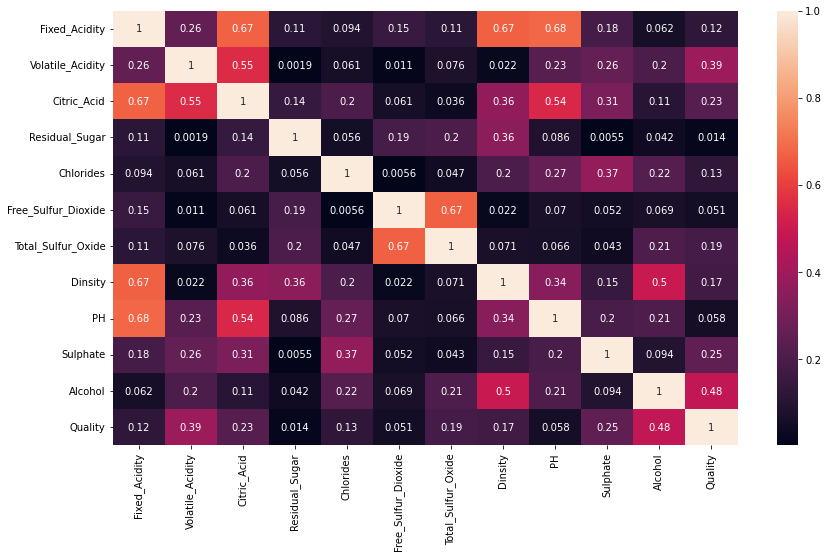

In [272]:
df_corr = df.corr().abs() #this code will get thecoefficient of one variable vs all other variables, abs is absolute no

plt.figure(figsize = (14, 8))

sns.heatmap(df_corr, annot = True, annot_kws = {'size' : 10})

plt.show()

### Here we can see that the alcohol(label) and quality(target) are highly correlated with each other

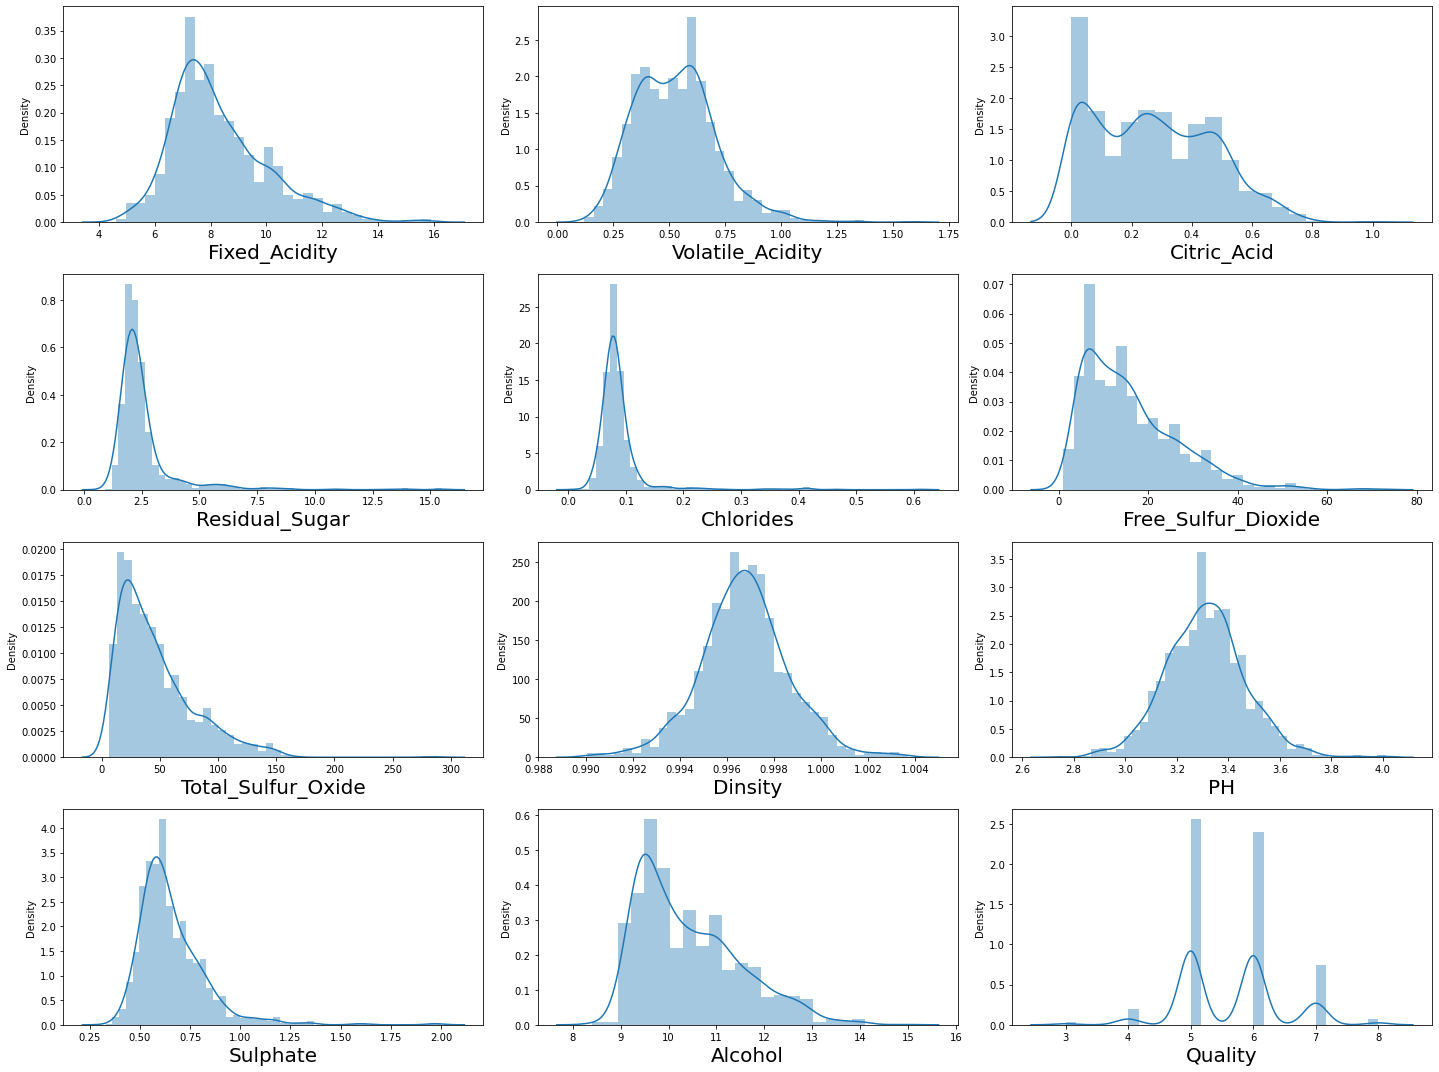

In [273]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()    

#### From the above plots we can  understand that skewness is present in almost all columns

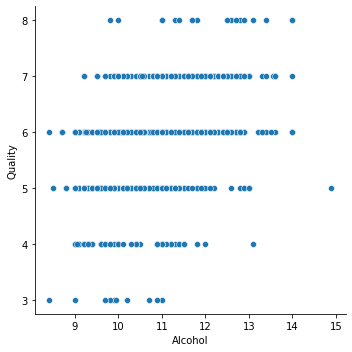

In [274]:
sns.relplot(x = 'Alcohol', y='Quality', data = df)
plt.show()

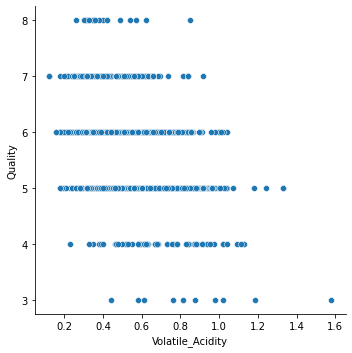

In [275]:
sns.relplot(x = 'Volatile_Acidity', y='Quality', data = df)
plt.show()

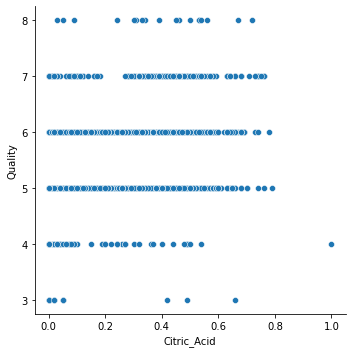

In [276]:
sns.relplot(x = 'Citric_Acid', y='Quality', data = df)
plt.show()

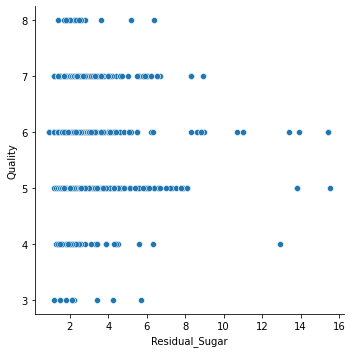

In [277]:
sns.relplot(x = 'Residual_Sugar', y='Quality', data = df)
plt.show()

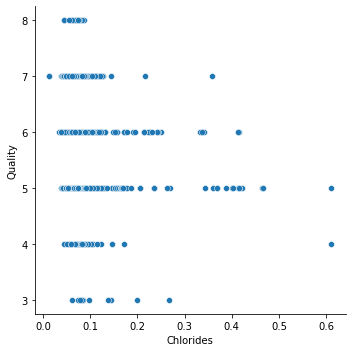

In [278]:
sns.relplot(x = 'Chlorides', y='Quality', data = df)
plt.show()

<AxesSubplot:ylabel='Frequency'>

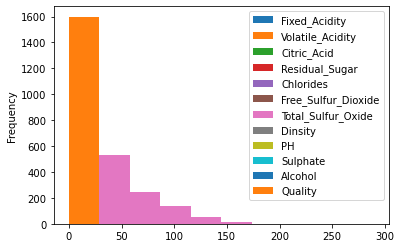

In [279]:
df.plot(kind = 'hist')  #hist - histograph

<AxesSubplot:ylabel='Frequency'>

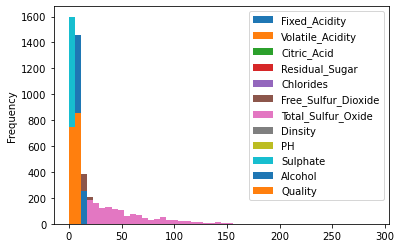

In [280]:
df.plot(kind = 'hist', bins = 50)

array([[<AxesSubplot:title={'center':'Fixed_Acidity'}>,
        <AxesSubplot:title={'center':'Volatile_Acidity'}>,
        <AxesSubplot:title={'center':'Citric_Acid'}>],
       [<AxesSubplot:title={'center':'Residual_Sugar'}>,
        <AxesSubplot:title={'center':'Chlorides'}>,
        <AxesSubplot:title={'center':'Free_Sulfur_Dioxide'}>],
       [<AxesSubplot:title={'center':'Total_Sulfur_Oxide'}>,
        <AxesSubplot:title={'center':'Dinsity'}>,
        <AxesSubplot:title={'center':'PH'}>],
       [<AxesSubplot:title={'center':'Sulphate'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Quality'}>]], dtype=object)

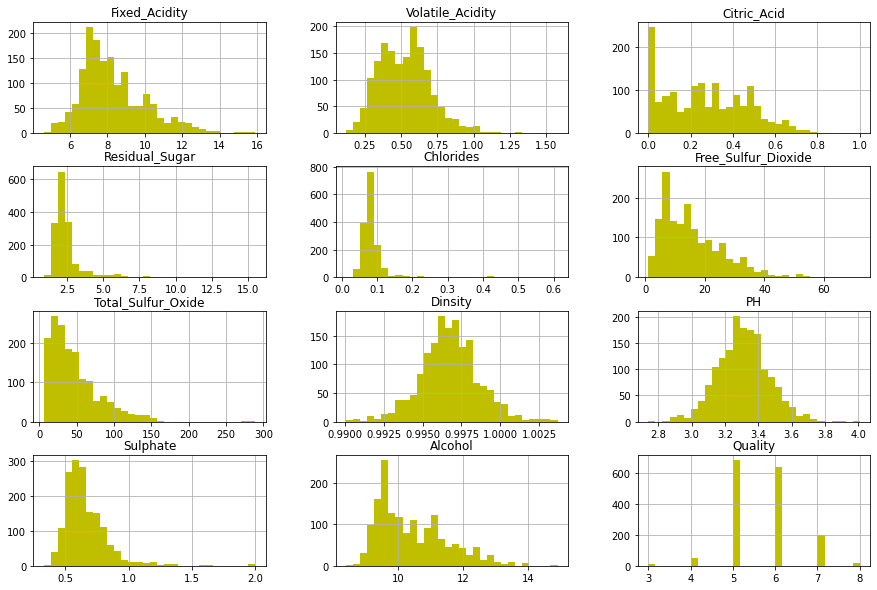

In [281]:
df.hist(color = 'y', figsize = (15,10), bins = 30)

## Let's first deal with the outliers

### As we dont remove the outliers from target variable then first saperate the features andstore themin another datframe

In [282]:
df_features = df.drop('Quality', axis = 1)

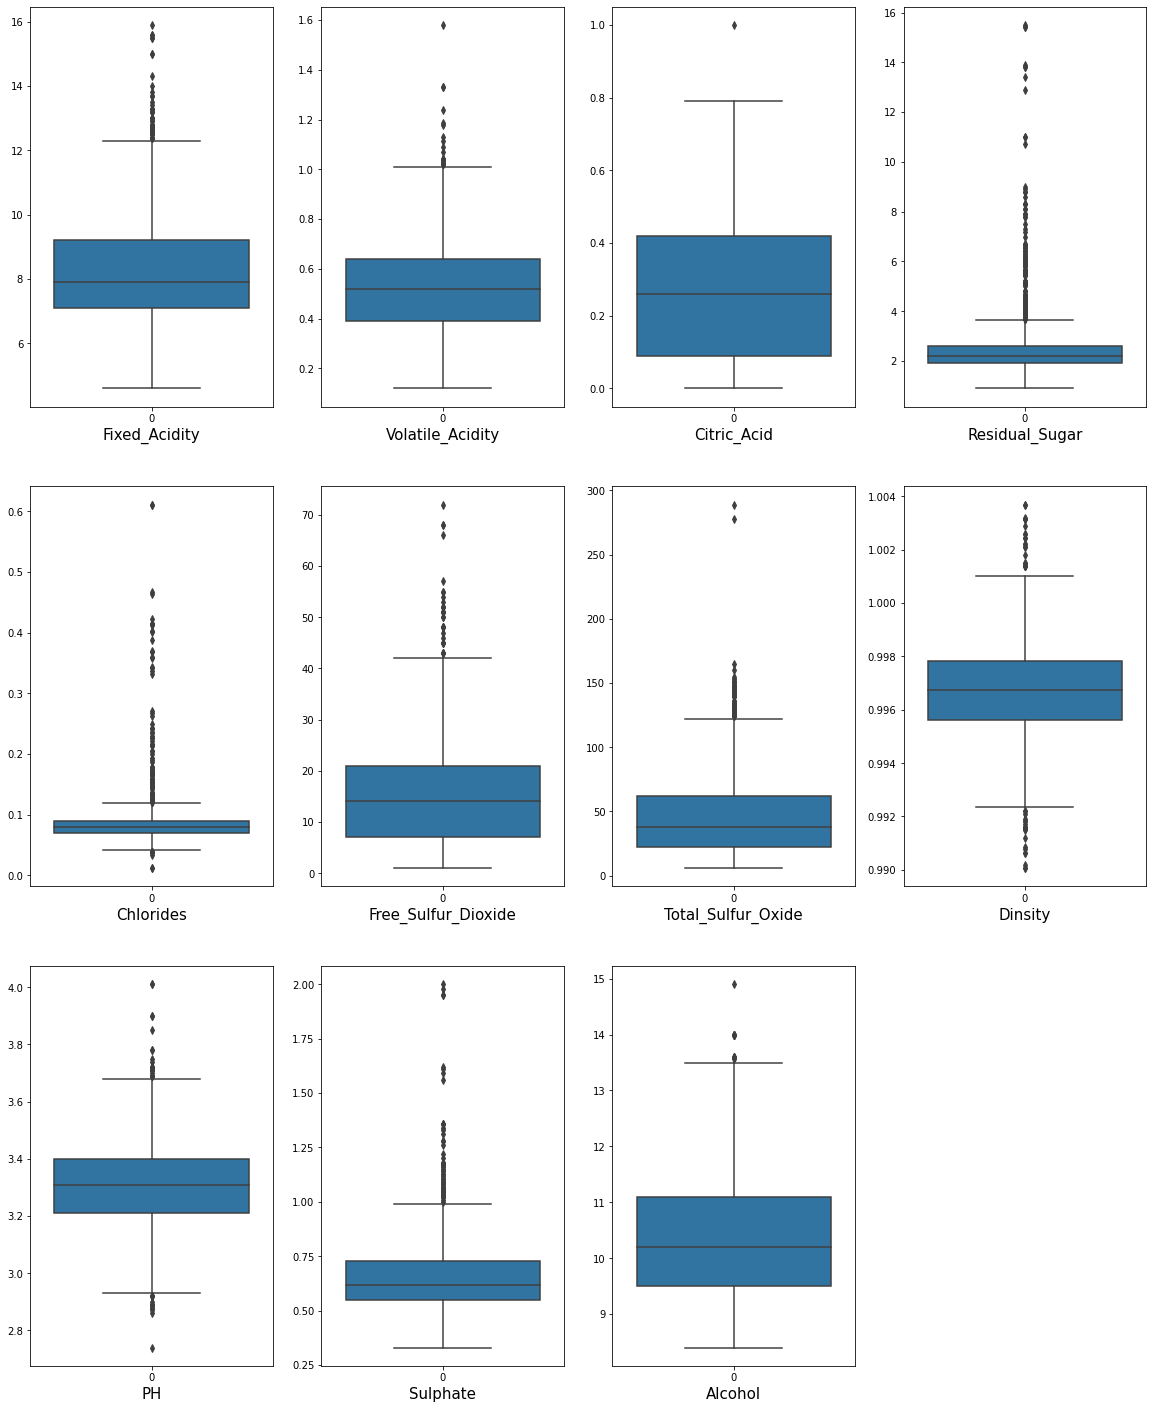

In [283]:
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph <= 12:  #as there are 9 columns in the data
        plt.subplot(3,4,graph)
        ax = sns.boxplot(data = df_features[column])
        plt.xlabel(column,fontsize=15)
        
    graph += 1
    
plt.show()    

### By osberving the above grapgs we can clearly seen that the outliers are present in the dataset

### Observation Summary

Outliers are present

Multicollinearity problem exist

Skeweness is present

## At first we hv to deal with outliers

In [284]:
df.shape

(1599, 12)

In [285]:
# Find the IQR(Inter Quantile Range) to identify outliers

# 1rst quantile

q1 = df.quantile(0.25)

#3rd quantile

q3 = df.quantile(0.75)

#IQR

iqr = q3 - q1

iqr

Fixed_Acidity           2.100000
Volatile_Acidity        0.250000
Citric_Acid             0.330000
Residual_Sugar          0.700000
Chlorides               0.020000
Free_Sulfur_Dioxide    14.000000
Total_Sulfur_Oxide     40.000000
Dinsity                 0.002235
PH                      0.190000
Sulphate                0.180000
Alcohol                 1.600000
Quality                 1.000000
dtype: float64

# Outlier detection formula

### higher side ==> Q3 + (1.5 * IQR)

### lower side ==> Q1 - (1.5 * IQR)

In [286]:
# Validating one outlier
FixedAcidity_high = (q3.Fixed_Acidity + (1.5 * iqr.Fixed_Acidity))

FixedAcidity_high

12.349999999999998

In [287]:
# Check the indexes which hv higher values

index = np.where(df['Fixed_Acidity'] > FixedAcidity_high)
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [288]:
# Drop the index which we found in the above cell

df = df.drop(df.index[index])

df.shape

(1550, 12)

In [289]:
df.reset_index()

,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [290]:
VolAcidity_high = (q3.Volatile_Acidity + (1.5 * iqr.Volatile_Acidity))
print(VolAcidity_high)

index = np.where(df['Volatile_Acidity'] > VolAcidity_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.0150000000000001
(1531, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [291]:
VolAcidity_high = (q3.Volatile_Acidity + (1.5 * iqr.Volatile_Acidity))
print(VolAcidity_high)

index = np.where(df['Volatile_Acidity'] > VolAcidity_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.0150000000000001
(1531, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [292]:
Citric_high = (q3.Citric_Acid + (1.5 * iqr.Citric_Acid))
print(Citric_high)

index = np.where(df['Citric_Acid'] > Citric_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

0.9149999999999999
(1530, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1526,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1527,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1528,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [293]:
Residual_high = (q3.Residual_Sugar + (1.5 * iqr.Residual_Sugar))
print(Residual_high)

index = np.where(df['Residual_Sugar'] > Residual_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

3.6500000000000004
(1392, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1388,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1389,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1390,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [294]:
Chlorides_high = (q3.Chlorides + (1.5 * iqr.Chlorides))
print(Chlorides_high)

index = np.where(df['Chlorides'] > Chlorides_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

0.11999999999999998
(1311, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [295]:
Free_Sulfur_high = (q3.Free_Sulfur_Dioxide + (1.5 * iqr.Free_Sulfur_Dioxide))
print(Free_Sulfur_high)

index = np.where(df['Free_Sulfur_Dioxide'] > Free_Sulfur_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

42.0
(1295, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1291,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1292,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1293,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [296]:
Tot_Sulfur_high = (q3.Total_Sulfur_Oxide + (1.5 * iqr.Total_Sulfur_Oxide))
print(Tot_Sulfur_high)

index = np.where(df['Total_Sulfur_Oxide'] > Tot_Sulfur_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

122.0
(1259, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [297]:
Dinsity_high = (q3.Dinsity + (1.5 * iqr.Dinsity))
print(Dinsity_high)

index = np.where(df['Dinsity'] > Dinsity_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.0011875
(1259, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [298]:
PH_high = (q3.PH + (1.5 * iqr.PH))
print(PH_high)

index = np.where(df['PH'] > PH_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

3.6849999999999996
(1240, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1236,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1237,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1238,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [299]:
Sulphate_high = (q3.Sulphate + (1.5 * iqr.Sulphate))
print(Sulphate_high)

index = np.where(df['Sulphate'] > Sulphate_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

0.9999999999999999
(1220, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1216,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1217,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1218,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [300]:
Alcohol_high = (q3.Alcohol + (1.5 * iqr.Alcohol))
print(Alcohol_high)

index = np.where(df['Alcohol'] > Alcohol_high)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

13.5
(1212, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1208,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1209,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1210,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [301]:
Chlorides_low = (q1.Chlorides - (1.5 * iqr.Chlorides))
print(Chlorides_low)

index = np.where(df['Chlorides'] < Chlorides_low)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

0.04000000000000002
(1204, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1200,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1201,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1202,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [302]:
Dinsity_low = (q1.Dinsity - (1.5 * iqr.Dinsity))
print(Dinsity_low)

index = np.where(df['Dinsity'] < Dinsity_low)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

0.9922475000000001
(1198, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1194,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1195,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1196,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [303]:
PH_low = (q1.PH - (1.5 * iqr.PH))
print(PH_low)

index = np.where(df['PH'] < PH_low)

df = df.drop(df.index[index])

print(df.shape)

df.reset_index()

2.925
(1194, 12)


,index,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1190,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1191,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1192,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## After removing outliers we again see the graph

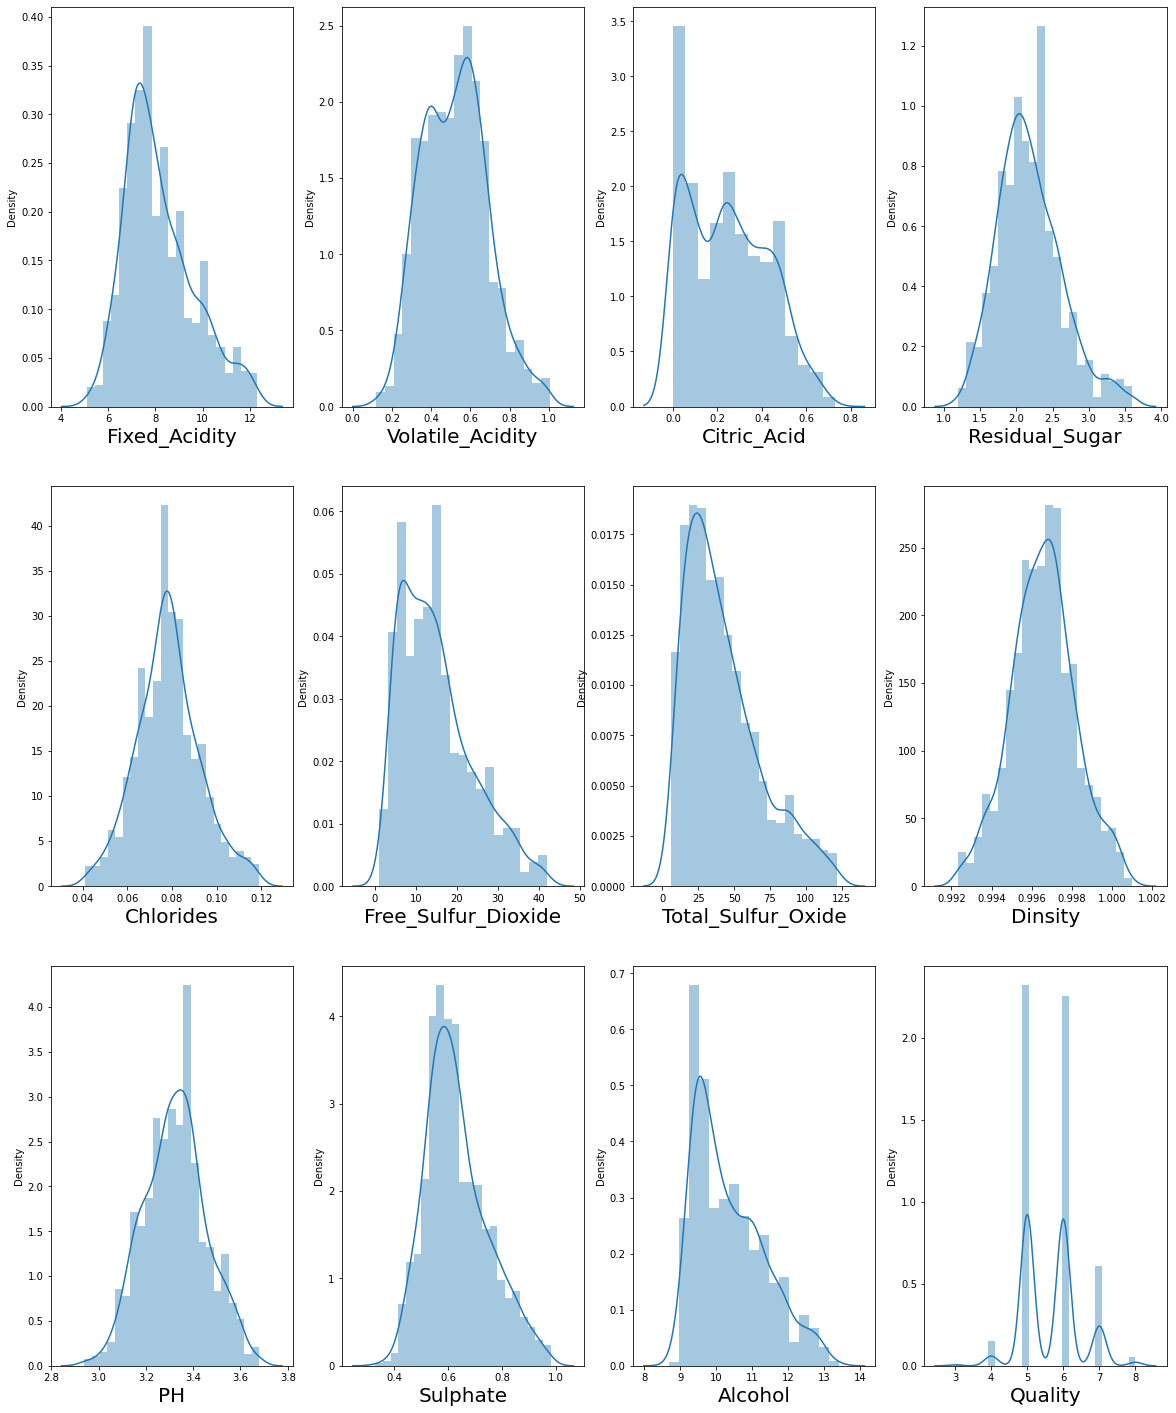

In [304]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber <= 12:  #as there are 12 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
    
plt.show()    

## Great ! distribution of data much better than previous .

## Now we hv to deal with multicollinearity

## Finding relationship. We want to keep only those features which hv relationship with label.

In [305]:
x = df.drop(columns = ['Quality'])

y = df['Quality']

### Before we fit our data to a model, let's visualize the relationship between our independent variables and the target.

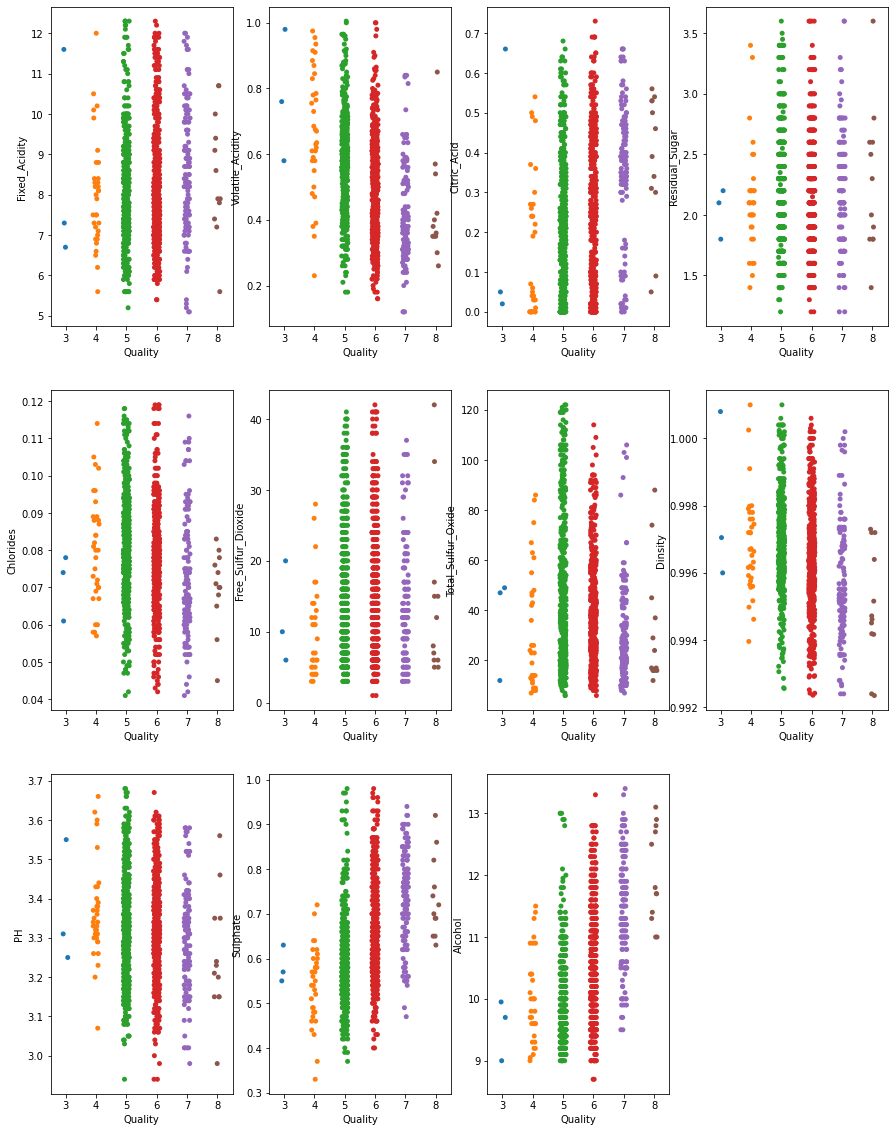

In [306]:
# Let's see how features are related to target

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[column])
        
    plotnumber += 1
    
plt.show()    

### Great!! Let's proceed by multicolinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

### Now we are going to deal check skeweness

In [307]:
#Checking for  skeweness

df.skew()

Fixed_Acidity          0.731072
Volatile_Acidity       0.285773
Citric_Acid            0.305563
Residual_Sugar         0.619622
Chlorides              0.225858
Free_Sulfur_Dioxide    0.844992
Total_Sulfur_Oxide     0.981893
Dinsity                0.047443
PH                     0.060418
Sulphate               0.615406
Alcohol                0.775389
Quality                0.342786
dtype: float64

In [308]:
df

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Oxide,Dinsity,PH,Sulphate,Alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Model Training

## Decision Tree Classifier

In [309]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 41)

In [310]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================TRAIN RESULT=================')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
        
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('\n==================TEST RESULT====================')
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [312]:
# Model initiation
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [314]:
# Call the function and pass dataset to check train and test score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

metric_score(clf,x_train,x_test,y_train,y_test,train=True)   #This is for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)   #This is for testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 65.55%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.25      0.24         8
           5       0.77      0.65      0.70       134
           6       0.60      0.75      0.66       116
           7       0.63      0.50      0.56        38
           8       1.00      0.50      0.67         2

    accuracy                           0.66       299
   macro avg       0.54      0.44      0.47       299
weighted avg       0.67      0.66      0.66       299



## Bagging Classifier

## Random Forest

In [331]:
# IMportant libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing , Normalization
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [332]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================TRAIN RESULT=================')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
        
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('\n==================TEST RESULT====================')
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        
### Model Confidence/Accuracy      
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [333]:
# Initiate RandomForestClassifier with new parameters and train
random_clf = RandomForestClassifier()

#Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [334]:
## Call the funtion and pass the dataset to check train and test score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)    #Training Score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)   #Testing Score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 70.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.80      0.74      0.77       134
           6       0.61      0.82      0.70       116
           7       0.89      0.45      0.60        38
           8       1.00      0.50      0.67         2

    accuracy                           0.71       299
   macro avg       0.55      0.42      0.46       299
weighted avg       0.72      0.71      0.70       299



## Its better than Decision Tree

### as compae to train score(99.99%) test score is less(ie 71.25%)
### Then we can minimise this distance by tuning the parameters
### Let's Tune the parameters using GridSearchCV
###  RandomForestClassifier

### RandomForestClassifier

In [335]:
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

grd = GridSearchCV(random_clf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params =>', grd.best_params_)

best_params => {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [336]:
random_clf = grd.best_estimator_              #reinstantiating with best params

random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=13)

In [337]:
#Call the function and pass dataset to check tarin and test score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)    #Training Score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)   #Testing Score


==================TRAIN RESULT=================
Accuracy Score: 81.45%

==================TEST RESULT====================
Accuracy Score: 64.88%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.73      0.72      0.72       134
           6       0.56      0.73      0.64       116
           7       0.81      0.34      0.48        38
           8       0.00      0.00      0.00         2

    accuracy                           0.65       299
   macro avg       0.35      0.30      0.31       299
weighted avg       0.65      0.65      0.63       299



### Gradient Boosted Tree(GradientBoostedDecisionTree/ GBDT Model)

In [345]:
from sklearn.feature_selection import SelectPercentile, chi2

In [346]:
# Instantiate SelectPercentile and fit(feature, label)

x = df.drop(['Quality'], axis = 1)

y = df.Quality

SPercentile = SelectPercentile(score_func = chi2, percentile = 80)

SPercentile = SPercentile.fit(x,y)

In [347]:
# Saperate the features tocheck p-values

cols = SPercentile.get_support(indices = True)  #to return index num instead of boolean
print('Feature index = ',cols)

features = x.columns[cols]
print('Features = ',list(features))


Feature index =  [ 0  1  2  3  5  6  9 10]
Features =  ['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Oxide', 'Sulphate', 'Alcohol']


In [348]:
df_scores = pd.DataFrame({'features':x.columns, 'chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})
df_scores.sort_values(by = 'chi2Score', ascending=False)

,features,chi2Score,pValue
6,Total_Sulfur_Oxide,1290.703455,6.597410e-277
5,Free_Sulfur_Dioxide,96.351137,3.102210e-19
10,Alcohol,31.119174,8.873153e-06
2,Citric_Acid,8.840638,1.155919e-01
1,Volatile_Acidity,8.016279,1.553407e-01
0,Fixed_Acidity,4.963081,4.204024e-01
9,Sulphate,4.544704,4.739246e-01
3,Residual_Sugar,0.178570,9.993274e-01
4,Chlorides,0.136831,9.996491e-01
8,PH,0.066430,9.999409e-01


## Note : We reject the null hypothesis when the pvalue is less than 0.05
## Let's print 80% of selected features

In [350]:
#### Create subset of selected features

x = df[features]

y = df.Quality

In [351]:
# Import libraries

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=42)

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score

In [353]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================TRAIN RESULT=================')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
        
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('\n==================TEST RESULT====================')
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [354]:
# Initiate GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()

# Train the model
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [355]:
# Call the function and pass the dataset to check the train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)   #For training score


metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)   #For testing score


==================TRAIN RESULT=================
Accuracy Score: 91.74%

==================TEST RESULT====================
Accuracy Score: 67.13%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.73      0.72      0.73       160
           6       0.65      0.72      0.69       150
           7       0.59      0.49      0.53        35
           8       0.00      0.00      0.00         5

    accuracy                           0.67       359
   macro avg       0.33      0.32      0.32       359
weighted avg       0.66      0.67      0.66       359



## Let's try to increse the test result by doing the parameter tuning

In [356]:
from sklearn.model_selection import GridSearchCV

In [357]:
grid_param = {
    'max_depth' : range(4,8),
    'min_samples_split' : (2,8,2),
    'learning_rate' : np.arange(0.1,0.3)
}

In [358]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': (2, 8, 2)})

In [359]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 8}

In [360]:
gbdt_clf = GradientBoostingClassifier(
    max_depth = 5, min_samples_split = 8, learning_rate = 0.1)

gbdt_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=8)

In [361]:
# Call the function and pass the dataset to check the train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)   #For training score


metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)   #For testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 69.08%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.76      0.74      0.75       160
           6       0.69      0.73      0.71       150
           7       0.54      0.57      0.56        35
           8       0.00      0.00      0.00         5

    accuracy                           0.69       359
   macro avg       0.33      0.34      0.34       359
weighted avg       0.68      0.69      0.68       359

